In [11]:
import warnings
warnings.filterwarnings('ignore')

TARGET = 'mpg'
DISCOVERY_TIMEOUT_SECONDS=3
ESTIMATION_TIMEOUT_SECONDS=3
REFUTATION_GLOBAL_TIMEOUT_SECONDS=3
REFUTATION_MODEL_TIMEOUT_SECONDS=3

# Dataset and Knowledge settings

In [12]:
import pandas as pd

df = pd.read_csv('./resources/auto_mpg/data.csv')
df['origin'] = df['origin'].astype(float)
df['cylinders'] = df['cylinders'].astype(float)
df['horsepower'] = df['horsepower'].astype(float)
df['modelyear'] = df['modelyear'].astype(float)
df['weight'] = df['weight'].astype(float)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...,...
387,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
388,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
389,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
390,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


In [13]:
display(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    float64
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   modelyear     392 non-null    float64
 7   origin        392 non-null    float64
dtypes: float64(8)
memory usage: 24.6 KB


None

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [14]:
from causal_nest.knowledge import parse_knowledge_file

knowledge = parse_knowledge_file('./resources/auto_mpg/knowledge.txt')
knowledge

Knowledge(required_edges=[], forbidden_edges=[('acceleration', 'displacement'), ('mpg', 'displacement'), ('horsepower', 'origin'), ('horsepower', 'modelyear'), ('acceleration', 'origin'), ('mpg', 'origin'), ('cylinders', 'origin'), ('displacement', 'weight'), ('acceleration', 'modelyear'), ('mpg', 'modelyear'), ('cylinders', 'modelyear'), ('displacement', 'cylinders'), ('acceleration', 'horsepower'), ('mpg', 'horsepower'), ('horsepower', 'weight'), ('displacement', 'origin'), ('acceleration', 'weight'), ('horsepower', 'cylinders'), ('mpg', 'weight'), ('cylinders', 'weight'), ('displacement', 'modelyear'), ('acceleration', 'cylinders'), ('mpg', 'cylinders'), ('horsepower', 'displacement')])

In [15]:
from causal_nest.dataset import MissingDataHandlingMethod, Dataset, handle_missing_data, FeatureTypeMap, FeatureType, estimate_feature_importances

feature_mapping = [FeatureTypeMap(feature=c, type=FeatureType.CONTINUOUS) for c in df.drop(TARGET, axis=1).columns]

dataset = Dataset(data=df, target=TARGET, feature_mapping=feature_mapping)
dataset = handle_missing_data(dataset, MissingDataHandlingMethod.FORWARD_FILL)
dataset = estimate_feature_importances(dataset)
dataset

Dataset(data=      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0        8.0         307.0       130.0  3504.0          12.0   
1    15.0        8.0         350.0       165.0  3693.0          11.5   
2    18.0        8.0         318.0       150.0  3436.0          11.0   
3    16.0        8.0         304.0       150.0  3433.0          12.0   
4    17.0        8.0         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
387  27.0        4.0         140.0        86.0  2790.0          15.6   
388  44.0        4.0          97.0        52.0  2130.0          24.6   
389  32.0        4.0         135.0        84.0  2295.0          11.6   
390  28.0        4.0         120.0        79.0  2625.0          18.6   
391  31.0        4.0         119.0        82.0  2720.0          19.4   

     modelyear  origin  
0         70.0     1.0  
1         70.0     1.0  
2         70.0     1.0  
3         70.0     1.0

In [16]:
from causal_nest.problem import Problem

problem = Problem(dataset=dataset, description='Airfoil Self Noise', knowledge=knowledge)
problem

Problem(dataset=Dataset(data=      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0        8.0         307.0       130.0  3504.0          12.0   
1    15.0        8.0         350.0       165.0  3693.0          11.5   
2    18.0        8.0         318.0       150.0  3436.0          11.0   
3    16.0        8.0         304.0       150.0  3433.0          12.0   
4    17.0        8.0         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
387  27.0        4.0         140.0        86.0  2790.0          15.6   
388  44.0        4.0          97.0        52.0  2130.0          24.6   
389  32.0        4.0         135.0        84.0  2295.0          11.6   
390  28.0        4.0         120.0        79.0  2625.0          18.6   
391  31.0        4.0         119.0        82.0  2720.0          19.4   

     modelyear  origin  
0         70.0     1.0  
1         70.0     1.0  
2         70.0     1.0  
3     

## Checking the Feature infered importance

In [17]:
problem.dataset.feature_mapping

[FeatureTypeMap(feature='displacement', type=<FeatureType.CONTINUOUS: 3>, importance=0.29993544318570187),
 FeatureTypeMap(feature='weight', type=<FeatureType.CONTINUOUS: 3>, importance=0.24229243112295681),
 FeatureTypeMap(feature='cylinders', type=<FeatureType.CONTINUOUS: 3>, importance=0.19104271556195504),
 FeatureTypeMap(feature='modelyear', type=<FeatureType.CONTINUOUS: 3>, importance=0.12478490311286772),
 FeatureTypeMap(feature='horsepower', type=<FeatureType.CONTINUOUS: 3>, importance=0.10384082044652956),
 FeatureTypeMap(feature='acceleration', type=<FeatureType.CONTINUOUS: 3>, importance=0.03149594296830957),
 FeatureTypeMap(feature='origin', type=<FeatureType.CONTINUOUS: 3>, importance=0.006607743601679342)]

# Causal Discovery

In [18]:
from causal_nest.discovery import applyable_models

models = applyable_models(problem)
models

[causal_nest.discovery_models.pc.PC,
 causal_nest.discovery_models.gs.GS,
 causal_nest.discovery_models.ccdr.CCDR,
 causal_nest.discovery_models.iamb.IAMB,
 causal_nest.discovery_models.sam.SAM,
 causal_nest.discovery_models.bes.BES,
 causal_nest.discovery_models.grasp.GRASP,
 causal_nest.discovery_models.cgnn.CGNN]

In [19]:
from causal_nest.discovery import discover_with_all_models

problem = discover_with_all_models(problem, max_seconds_model=DISCOVERY_TIMEOUT_SECONDS)
problem.discovery_results

  0% 0/1000 [00:00<?, ?it/s]

GRaSP edge count: 12    
GRaSP completed in: 1.33s 


  0% 1/1000 [00:02<39:43,  2.39s/it, disc=0.35, gen=-.126, regul_loss=1.4, tot=-1.88]

Function raised R Package sparsebn is not available.
Traceback (most recent call last):
  File "/root/.cache/pypoetry/virtualenvs/causal-nest-9TtSrW0h-py3.9/lib/python3.9/site-packages/pebble/common.py", line 174, in process_execute
    return function(*args, **kwargs)
  File "/app/causal_nest/discovery.py", line 145, in _run_discover_with_model_task
    return discover_with_model(*args)
  File "/app/causal_nest/discovery.py", line 91, in discover_with_model
    output_graph = m.create_graph_from_data(problem.dataset)
  File "/app/causal_nest/discovery_models/ccdr.py", line 43, in create_graph_from_data
    m = CDT_CCDR()
  File "/root/.cache/pypoetry/virtualenvs/causal-nest-9TtSrW0h-py3.9/lib/python3.9/site-packages/cdt/causality/graph/CCDr.py", line 90, in __init__
    raise ImportError("R Package sparsebn is not available.")
ImportError: R Package sparsebn is not available.



  0% 2/1000 [00:03<22:49,  1.37s/it, disc=0.35, gen=-.126, regul_loss=1.4, tot=-1.88]

{'PC': None,
 'GS': None,
 'CCDR': None,
 'IAMB': None,
 'SAM': None,
 'BES': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7f88bd24d370>, model='BES', auc_pr=None, shd=None, sid=None, runtime=1.9939260820001437, priority_score=0.8928571428571427, knowledge_integrity_score=0.5833333333333333, forbidden_edges_violation_rate=0.4166666666666667, required_edges_compliance_rate=1.0),
 'GRASP': None,
 'CGNN': None}

In [20]:
list(sorted(filter(lambda x: x, problem.discovery_results.values()), key=lambda x: x.priority_score, reverse=True))

[DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7f88bd24d370>, model='BES', auc_pr=None, shd=None, sid=None, runtime=1.9939260820001437, priority_score=0.8928571428571427, knowledge_integrity_score=0.5833333333333333, forbidden_edges_violation_rate=0.4166666666666667, required_edges_compliance_rate=1.0)]

# Causal Estimation

In [21]:
from causal_nest.estimation import estimate_all_effects

problem = estimate_all_effects(problem, verbose=True, max_seconds_model=ESTIMATION_TIMEOUT_SECONDS)
problem.estimation_results

{'BES': [EstimationResult(model='BES', treatment='displacement', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7f88b78860a0>, estimate=<dowhy.causal_estimator.CausalEstimate object at 0x7f88b7886c70>, control_value=0, treatment_value=1, p_value=array([1.66064183e-90])),
  EstimationResult(model='BES', treatment='weight', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7f88b6d295e0>, estimate=<dowhy.causal_estimator.CausalEstimate object at 0x7f88b77b3130>, control_value=0, treatment_value=1, p_value=array([8.36162444e-107])),
  EstimationResult(model='BES', treatment='cylinders', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7f88b6de3520>, estimate=<dowhy.causal_estimator.CausalEstimate object at 0x7f88b6de3a60>, control_value=0, treatment_value=1, p_value=array([0.19430199])),
  EstimationResult(model='BES', treatment='modelyear', estimand=<dowhy.causal_identifier.identif

In [22]:
for m, er in problem.estimation_results.items():
    print('\n\n\nModel: ', m)
    for r in er:
        print(r.treatment, ': ', r.estimate.value)




Model:  BES
displacement :  -0.06005142781220485
weight :  -0.006632075291840067
cylinders :  -0.576347718581129
modelyear :  0.6962122587522792
horsepower :  -0.030786278243478904
acceleration :  -0.4156820132722636
origin :  0


# Refutation

In [23]:
from causal_nest.refutation import refute_all_results

problem = refute_all_results(problem, max_seconds_global=REFUTATION_GLOBAL_TIMEOUT_SECONDS, max_seconds_model=REFUTATION_MODEL_TIMEOUT_SECONDS)
problem.refutation_results

{'BES': []}

# Output Graphs

In [24]:
from causal_nest.result import generate_all_results


graphs = generate_all_results(problem)
graphs

{'PC': None,
 'GS': None,
 'CCDR': None,
 'IAMB': None,
 'SAM': None,
 'BES': 'digraph G {\nfontname="Helvetica,Arial,sans-serif";\nnode[style="filled", fontsize=20, penwidth=2.5, fixedsize=true, fontcolor="black", fillcolor="gray", color="black", shape="circle"];\nedge[penwidth=2, minlen=2];\nsplines="polyline";\n   "displacement"[width=1, height=1, label="displacement\n-0.06", fillcolor="lightpink"];\n   "weight"[width=1, height=1, label="weight\n-0.01", fillcolor="lightpink"];\n   "cylinders"[width=1, height=1, label="cylinders\n-0.58", fillcolor="lightpink"];\n   "modelyear"[width=1, height=1, label="modelyear\n0.70", fillcolor="#ADD8E6;0.5:#7EC1D7", fontcolor="black"];\n   "horsepower"[width=1, height=1, label="horsepower\n-0.03", fillcolor="lightpink"];\n   "acceleration"[width=1, height=1, label="acceleration\n-0.42", fillcolor="lightpink"];\n   "origin"[width=1, height=1, label="origin\n0.00", fillcolor="gray;0.25:lightgray;0.25:gray;0.25:lightgray;0.25", color="lightgray", sty

PC
No graph
GS
No graph
CCDR
No graph
IAMB
No graph
SAM
No graph
BES


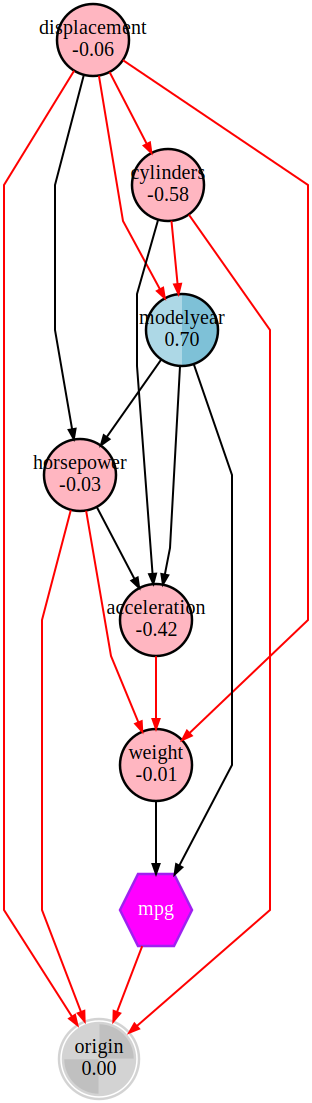

GRASP
No graph
CGNN
No graph


In [25]:
from graphviz import Source

for k, v in graphs.items():
    print(k)

    if v is None: 
        print('No graph')
    else:
        display(Source(v))